In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt
from skimage import io,color
import PIL
%matplotlib inline

# Following we performed pre-processing

### 1. Data Augmentation

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import os
import cv2

# Set up the ImageDataGenerator with the desired augmentation parameters
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Set the directory containing the original images
base_dir = 'EDI_DATASET/train/Body'
out_dir =  'EDI_DATASET/train/Body'

# Get a list of all the image filenames in the directory
filenames = os.listdir(base_dir)

# Iterate over each image file, and apply the augmentation transformations
for filename in filenames:
    try:
        # Load the image into memory using OpenCV
        img = cv2.imread(os.path.join(base_dir, filename))
        #img = cv2.resize(img, (224, 224))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        # Convert the image to a numpy array
        x = img_to_array(img)

        # Reshape the array to match the expected input shape of the model (e.g. 3 channels, 224 x 224 pixels)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images using the ImageDataGenerator
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=out_dir, save_prefix=filename.split('.')[0], save_format='jpg'):
            i += 1
            if i >= 1: # Generate 5 augmented images for each original image
                break
    except Exception as e:
        # If an error occurs while processing the image, print an error message and continue with the next image
        print(f"Error processing image {filename}: {e}")
        continue


## 2. Adding noise



# Set the directory containing the original images
base_dir = 'EDI_DATASET/train/Body'

# Set the output directory for the noisy images
output_dir = 'EDI_DATASET/train/Body'

# Iterate over each image file, and add random noise
for filename in os.listdir(base_dir):
    try:
        # Load the original image
        img = cv2.imread(os.path.join(base_dir, filename))
        # Add random Gaussian noise to the image
        mean = 0
        var = 0.1
        sigma = var**0.5
        gaussian = np.random.normal(mean, sigma, img.shape)
        noisy_image = np.clip(img + gaussian*255, 0, 255).astype(np.uint8)
        
        noisy_filename = f"{filename.split('.')[0]}_noisy.jpg"
        
        # Save the noisy image to disk
        cv2.imwrite(os.path.join(output_dir, noisy_filename), noisy_image)
    except AttributeError:
        # Skip over files that cannot be read
        print(f"Could not read file: {filename}")
        continue


In [48]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) #rescaling
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory(r"EDI_DATASET\train",
                                                 seed=42,
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 target_size=(224,224))
test_generator=test_datagen.flow_from_directory(r"EDI_DATASET\test",
                                                 seed = 42,
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 target_size=(224,224))
val_generator=val_datagen.flow_from_directory(r"EDI_DATASET\valid",
                                                seed = 42,
                                                batch_size=64,
                                                class_mode='categorical',
                                                target_size=(224,224))


Found 58825 images belonging to 44 classes.
Found 3781 images belonging to 44 classes.
Found 4171 images belonging to 44 classes.


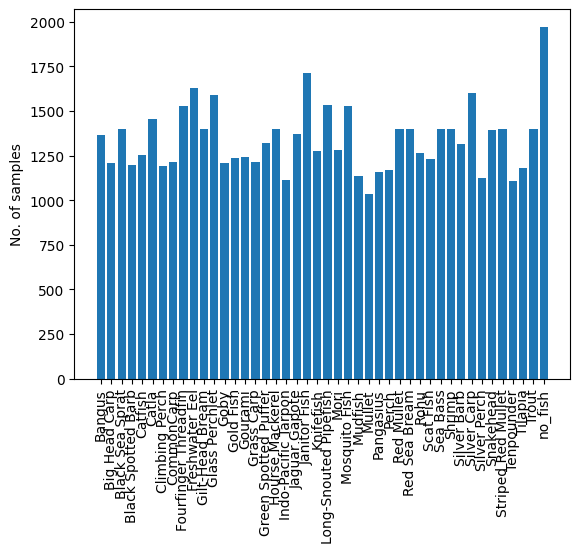

In [51]:
x = classes
y = [1368, 1206 ,1400 ,1200 ,1256 , 1454 ,1190 ,1214, 1529 , 1628 , 1400 , 1590 ,1210,1236,1245,1212, 1320, 1400,  1116, 1374, 1716, 1276, 1536,1280,1526,1136,1037, 1158,1172,1400,1400, 1264, 1232, 1400,  1400 , 1316 ,1602 , 1125 ,1392 ,1400 ,1108 , 1183, 1400,1973 ]
fig, ax = plt.subplots()
ax.bar(x,height = y)
ax.set(ylabel="No. of samples");
plt.xticks(rotation = 90);

In [49]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [50]:
walk_through_dir(r"EDI_DATASET\train")

There are 44 directories and 0 images in 'EDI_DATASET\train'.
There are 0 directories and 1368 images in 'EDI_DATASET\train\Bangus'.
There are 0 directories and 1206 images in 'EDI_DATASET\train\Big Head Carp'.
There are 0 directories and 1400 images in 'EDI_DATASET\train\Black Sea Sprat'.
There are 0 directories and 1200 images in 'EDI_DATASET\train\Black Spotted Barb'.
There are 0 directories and 1256 images in 'EDI_DATASET\train\Catfish'.
There are 0 directories and 1454 images in 'EDI_DATASET\train\Catla'.
There are 0 directories and 1190 images in 'EDI_DATASET\train\Climbing Perch'.
There are 0 directories and 1214 images in 'EDI_DATASET\train\CommonCarp'.
There are 0 directories and 1529 images in 'EDI_DATASET\train\Fourfinger Threadfin'.
There are 0 directories and 1628 images in 'EDI_DATASET\train\Freshwater Eel'.
There are 0 directories and 1400 images in 'EDI_DATASET\train\Gilt-Head Bream'.
There are 0 directories and 1590 images in 'EDI_DATASET\train\Glass Perchlet'.
There a

In [52]:
print(len(train_generator))
print(len(test_generator))
print(len(val_generator))

920
60
66


In [53]:
c=train_generator.class_indices
classes=list(c.keys())
classes

['Bangus',
 'Big Head Carp',
 'Black Sea Sprat',
 'Black Spotted Barb',
 'Catfish',
 'Catla',
 'Climbing Perch',
 'CommonCarp',
 'Fourfinger Threadfin',
 'Freshwater Eel',
 'Gilt-Head Bream',
 'Glass Perchlet',
 'Goby',
 'Gold Fish',
 'Gourami',
 'Grass Carp',
 'Green Spotted Puffer',
 'Hourse Mackerel',
 'Indo-Pacific Tarpon',
 'Jaguar Gapote',
 'Janitor Fish',
 'Knifefish',
 'Long-Snouted Pipefish',
 'Mori',
 'Mosquito Fish',
 'Mudfish',
 'Mullet',
 'Pangasius',
 'Perch',
 'Red Mullet',
 'Red Sea Bream',
 'Rohu',
 'Scat Fish',
 'Sea Bass',
 'Shrimp',
 'Silver Barb',
 'Silver Carp',
 'Silver Perch',
 'Snakehead',
 'Striped Red Mullet',
 'Tenpounder',
 'Tilapia',
 'Trout',
 'no_fish']

In [54]:
x,y=next(train_generator)
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

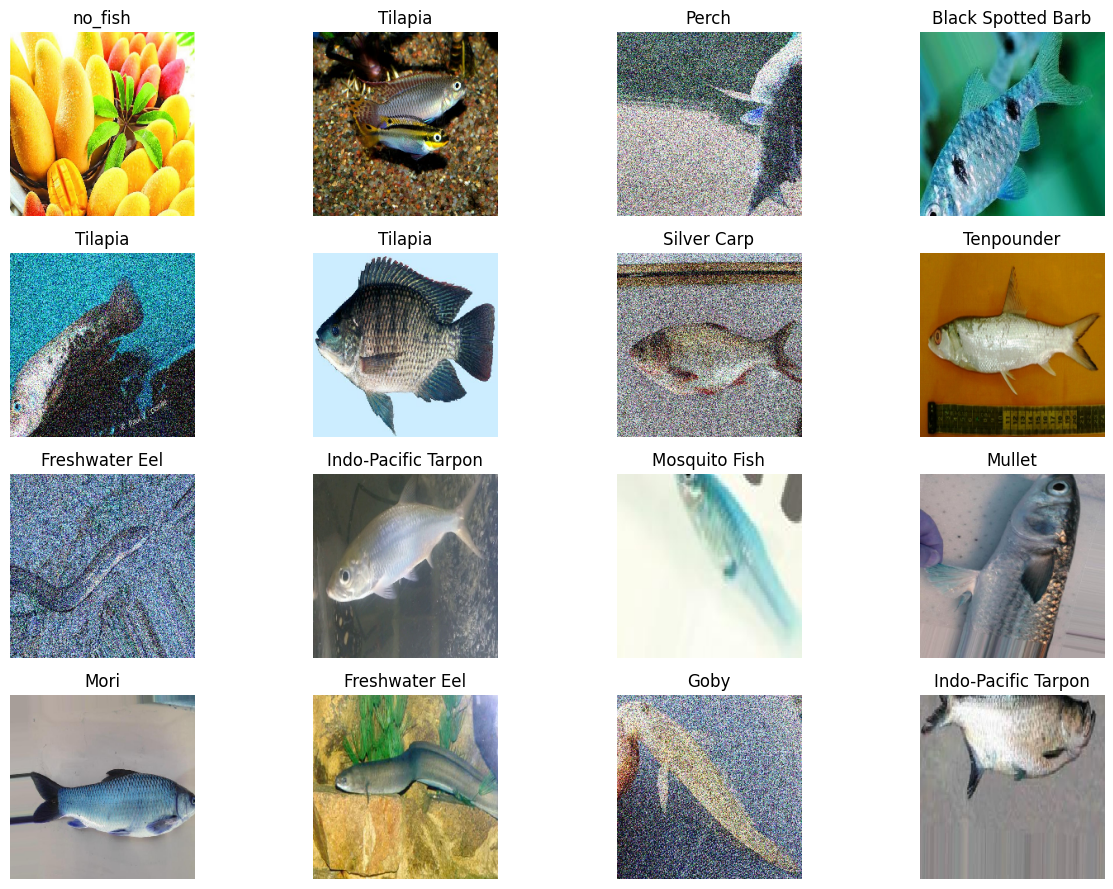

In [55]:
plotImages(x,y)

# Building of Model

In [107]:
import numpy as np

# Assuming y_train contains the class labels for your training data
class_counts = train_generator.classes
total_samples = len(train_generator.classes)
class_weights = {i: total_samples/(class_counts[i]+1e-6) for i in range(len(class_counts))}




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential([
    
    # Add the first convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
    BatchNormalization(),
    # Add a max pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2, 2)),
    
    # Add a second convolutional layer with 64 filters and a kernel size of 3x3
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    # Add a second max pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2, 2)),
    
    # Add a third convolutional layer with 128 filters and a kernel size of 3x3
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    # Add a third max pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2,2)),
    
    # Add a third convolutional layer with 256 filters and a kernel size of 3x3
    Conv2D(256,(3,3),activation='relu'),
    BatchNormalization(),
    # Add a third max pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2,2)),
    
    # Flatten the output of the convolutional layers
    Flatten(),
    
    # Add a fully connected layer with 256 units and ReLU activation
    Dense(256, activation='relu'),
    BatchNormalization(),
    
    # Add a dropout layer to prevent overfitting
    Dropout(0.25),
    
    # Add the output layer with the number of classes and softmax activation
    Dense(43, activation='softmax')
      
])



# Summary of the model

In [108]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_63 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_64 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                     

# Compile the model

In [109]:
#from tensorflow.keras.optimizers.legacy import Adam

model.compile(loss = "categorical_crossentropy", #
              optimizer = "adam", #adam optimizer updates weights faster
              metrics = "accuracy", )

# Fitting the model

In [110]:
from tensorflow.keras.callbacks import EarlyStopping


earlystop_callback = EarlyStopping(
    monitor='val_loss', # quantity to be monitored
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs to wait for improvement before stopping
    verbose=1, # 0: silent, 1: progress bar, 2: one line per epoch
    mode='auto' # direction of improvement to monitor ('auto', 'min', or 'max')
)



# fit the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=850,
    epochs=20,
    validation_data=val_generator,
    validation_steps=60,
    callbacks=[earlystop_callback],
    #class_weight=class_weights
)

Epoch 1/20
850/850 [==============================] - 4475s 5s/step - loss: 2.2622 - accuracy: 0.3864 - val_loss: 1.4123 - val_accuracy: 0.6166
Epoch 2/20
850/850 [==============================] - 5447s 6s/step - loss: 1.2573 - accuracy: 0.6415 - val_loss: 0.7696 - val_accuracy: 0.7813
Epoch 3/20
850/850 [==============================] - 4348s 5s/step - loss: 0.5183 - accuracy: 0.8542 - val_loss: 0.4816 - val_accuracy: 0.8614
Epoch 4/20
850/850 [==============================] - 4264s 5s/step - loss: 0.1748 - accuracy: 0.9521 - val_loss: 0.4425 - val_accuracy: 0.8682
Epoch 5/20
850/850 [==============================] - 5298s 6s/step - loss: 0.1100 - accuracy: 0.9670 - val_loss: 0.4665 - val_accuracy: 0.8703
Epoch 6/20
850/850 [==============================] - 4257s 5s/step - loss: 0.0932 - accuracy: 0.9698 - val_loss: 0.3902 - val_accuracy: 0.8961
Epoch 7/20
850/850 [==============================] - 4302s 5s/step - loss: 0.0973 - accuracy: 0.9678 - val_loss: 0.5214 - val_accuracy:

# Checking how well predictions are

In [111]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

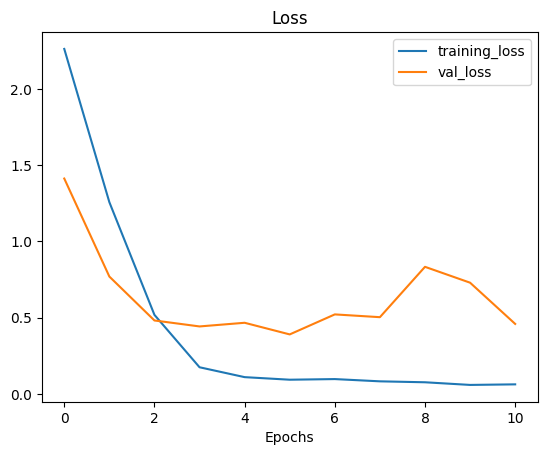

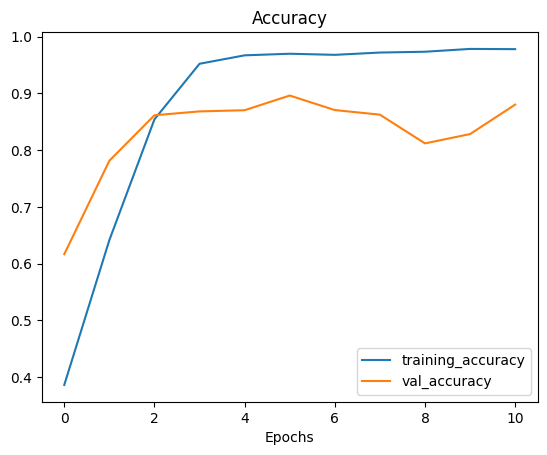

In [112]:
plot_loss_curves(history) #Valid curve should always be above train curve

In [113]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

57/57 [==============================] - 222s 4s/step - loss: 0.5216 - accuracy: 0.8753
Test Loss: 0.5216003060340881
Test Accuracy: 0.8753117322921753


# Checking model predictions

In [114]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [115]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred.argmax()] # if more than one output, take the max
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 94ms/step


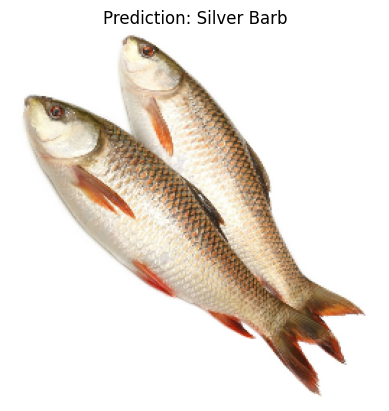

In [122]:
pred_and_plot(model, "", classes)

In [117]:
model.save("fish_iden_4.h5")

#  Building Find tuned MobileNet Model

In [57]:
import keras
mobile = keras.applications.mobilenet.MobileNet()

In [58]:
type(mobile)

keras.engine.functional.Functional

In [59]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [60]:
from keras.models import Model
from keras.layers import Dense


x = mobile.layers[-2].output
predictions = Dense(44,activation='softmax')(x)
model1= Model(inputs = mobile.input,outputs = predictions)

In [61]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [63]:
for layer in model1.layers[:-35]:
    layer.trainable=False

In [64]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [65]:
from tensorflow.keras.optimizers import Adam

model1.compile(Adam(learning_rate=.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [66]:
from tensorflow.keras.callbacks import EarlyStopping


earlystop_callback = EarlyStopping(
    monitor='val_loss', # quantity to be monitored
    min_delta=0.001, # minimum change in the monitored quantity to qualify as an improvement
    patience=5, # number of epochs to wait for improvement before stopping
    verbose=1, # 0: silent, 1: progress bar, 2: one line per epoch
    mode='auto' # direction of improvement to monitor ('auto', 'min', or 'max')
)



# fit the model with early stopping
history = model1.fit(
    train_generator,
    steps_per_epoch=920,
    epochs=30,
    validation_data=val_generator,
    validation_steps=66,
    callbacks=[earlystop_callback],
    #class_weight=class_weights
)

Epoch 1/30
920/920 [==============================] - 1983s 2s/step - loss: 1.2637 - accuracy: 0.6757 - val_loss: 0.2981 - val_accuracy: 0.9118
Epoch 2/30
920/920 [==============================] - 1498s 2s/step - loss: 0.4769 - accuracy: 0.8552 - val_loss: 0.2485 - val_accuracy: 0.9235
Epoch 3/30
920/920 [==============================] - 2164s 2s/step - loss: 0.2856 - accuracy: 0.9118 - val_loss: 0.2205 - val_accuracy: 0.9401
Epoch 4/30
920/920 [==============================] - 2019s 2s/step - loss: 0.1777 - accuracy: 0.9440 - val_loss: 0.1748 - val_accuracy: 0.9360
Epoch 5/30
920/920 [==============================] - 1605s 2s/step - loss: 0.1159 - accuracy: 0.9621 - val_loss: 0.1975 - val_accuracy: 0.9415
Epoch 6/30
920/920 [==============================] - 2297s 2s/step - loss: 0.0885 - accuracy: 0.9690 - val_loss: 0.1697 - val_accuracy: 0.9398
Epoch 7/30
920/920 [==============================] - 2304s 3s/step - loss: 0.0683 - accuracy: 0.9753 - val_loss: 0.2542 - val_accuracy:

In [95]:
model1.save("fish_iden_mobnet3.h5")

In [68]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

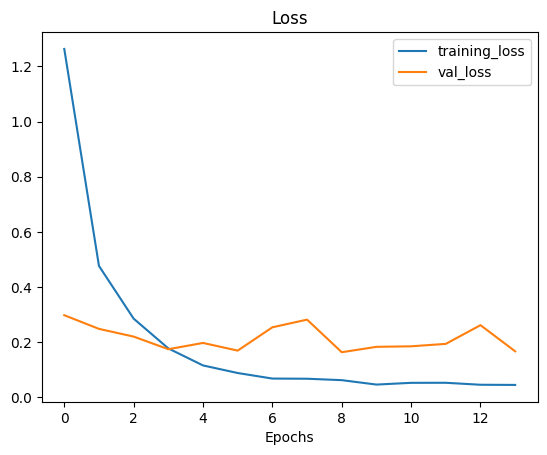

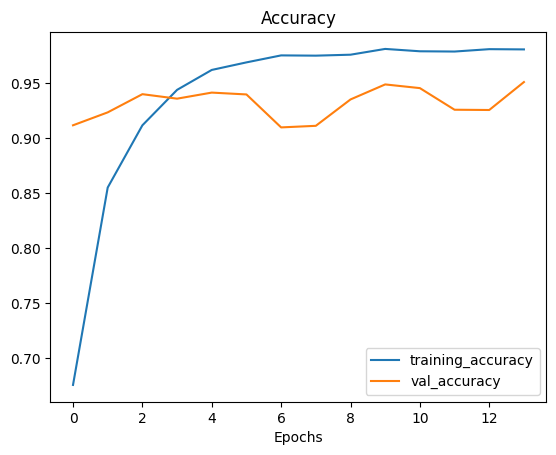

In [69]:
plot_loss_curves(history)

In [70]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [71]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred.argmax()] # if more than one output, take the max
  
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 63ms/step


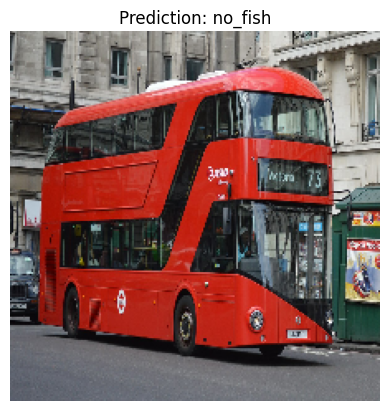

In [93]:
pred_and_plot(model,"internet_samples/no_fish1.jpg",classes)

In [73]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

60/60 [==============================] - 51s 839ms/step - loss: 0.1803 - accuracy: 0.9455
Test Loss: 0.180278018116951
Test Accuracy: 0.9455170631408691
